In [ ]:
# Instala ultralytics
%pip install ultralytics
# Importa libreria ultralytics
import ultralytics
# Revisa y visualiza las capacidades computacionales del computador virtual
ultralytics.checks()

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8

/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8


In [ ]:
!ls

0dbc52e812bd881ee4f22879b95984b7_png.rf.f1bce2373f654fac0ad110be6dcfdeae.jpg  README.roboflow.txt
data.yaml								      runs
preuba3.jpg								      train
prueba2.jpg								      valid
prueba4.jpg								      yolov8l-seg.pt
pruebas.jpg								      yolov8n.pt
README.dataset.txt


In [ ]:
!yolo task=detect mode=train model=yolov8l-seg.pt data=/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/data.yaml epochs=20 imgsz=600 save_period=1

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fals

In [ ]:
!ls /content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/runs/segment/train2/weights

best.pt     epoch12.pt	epoch15.pt  epoch18.pt	epoch2.pt  epoch5.pt  epoch8.pt
epoch10.pt  epoch13.pt	epoch16.pt  epoch19.pt	epoch3.pt  epoch6.pt  epoch9.pt
epoch11.pt  epoch14.pt	epoch17.pt  epoch1.pt	epoch4.pt  epoch7.pt  last.pt


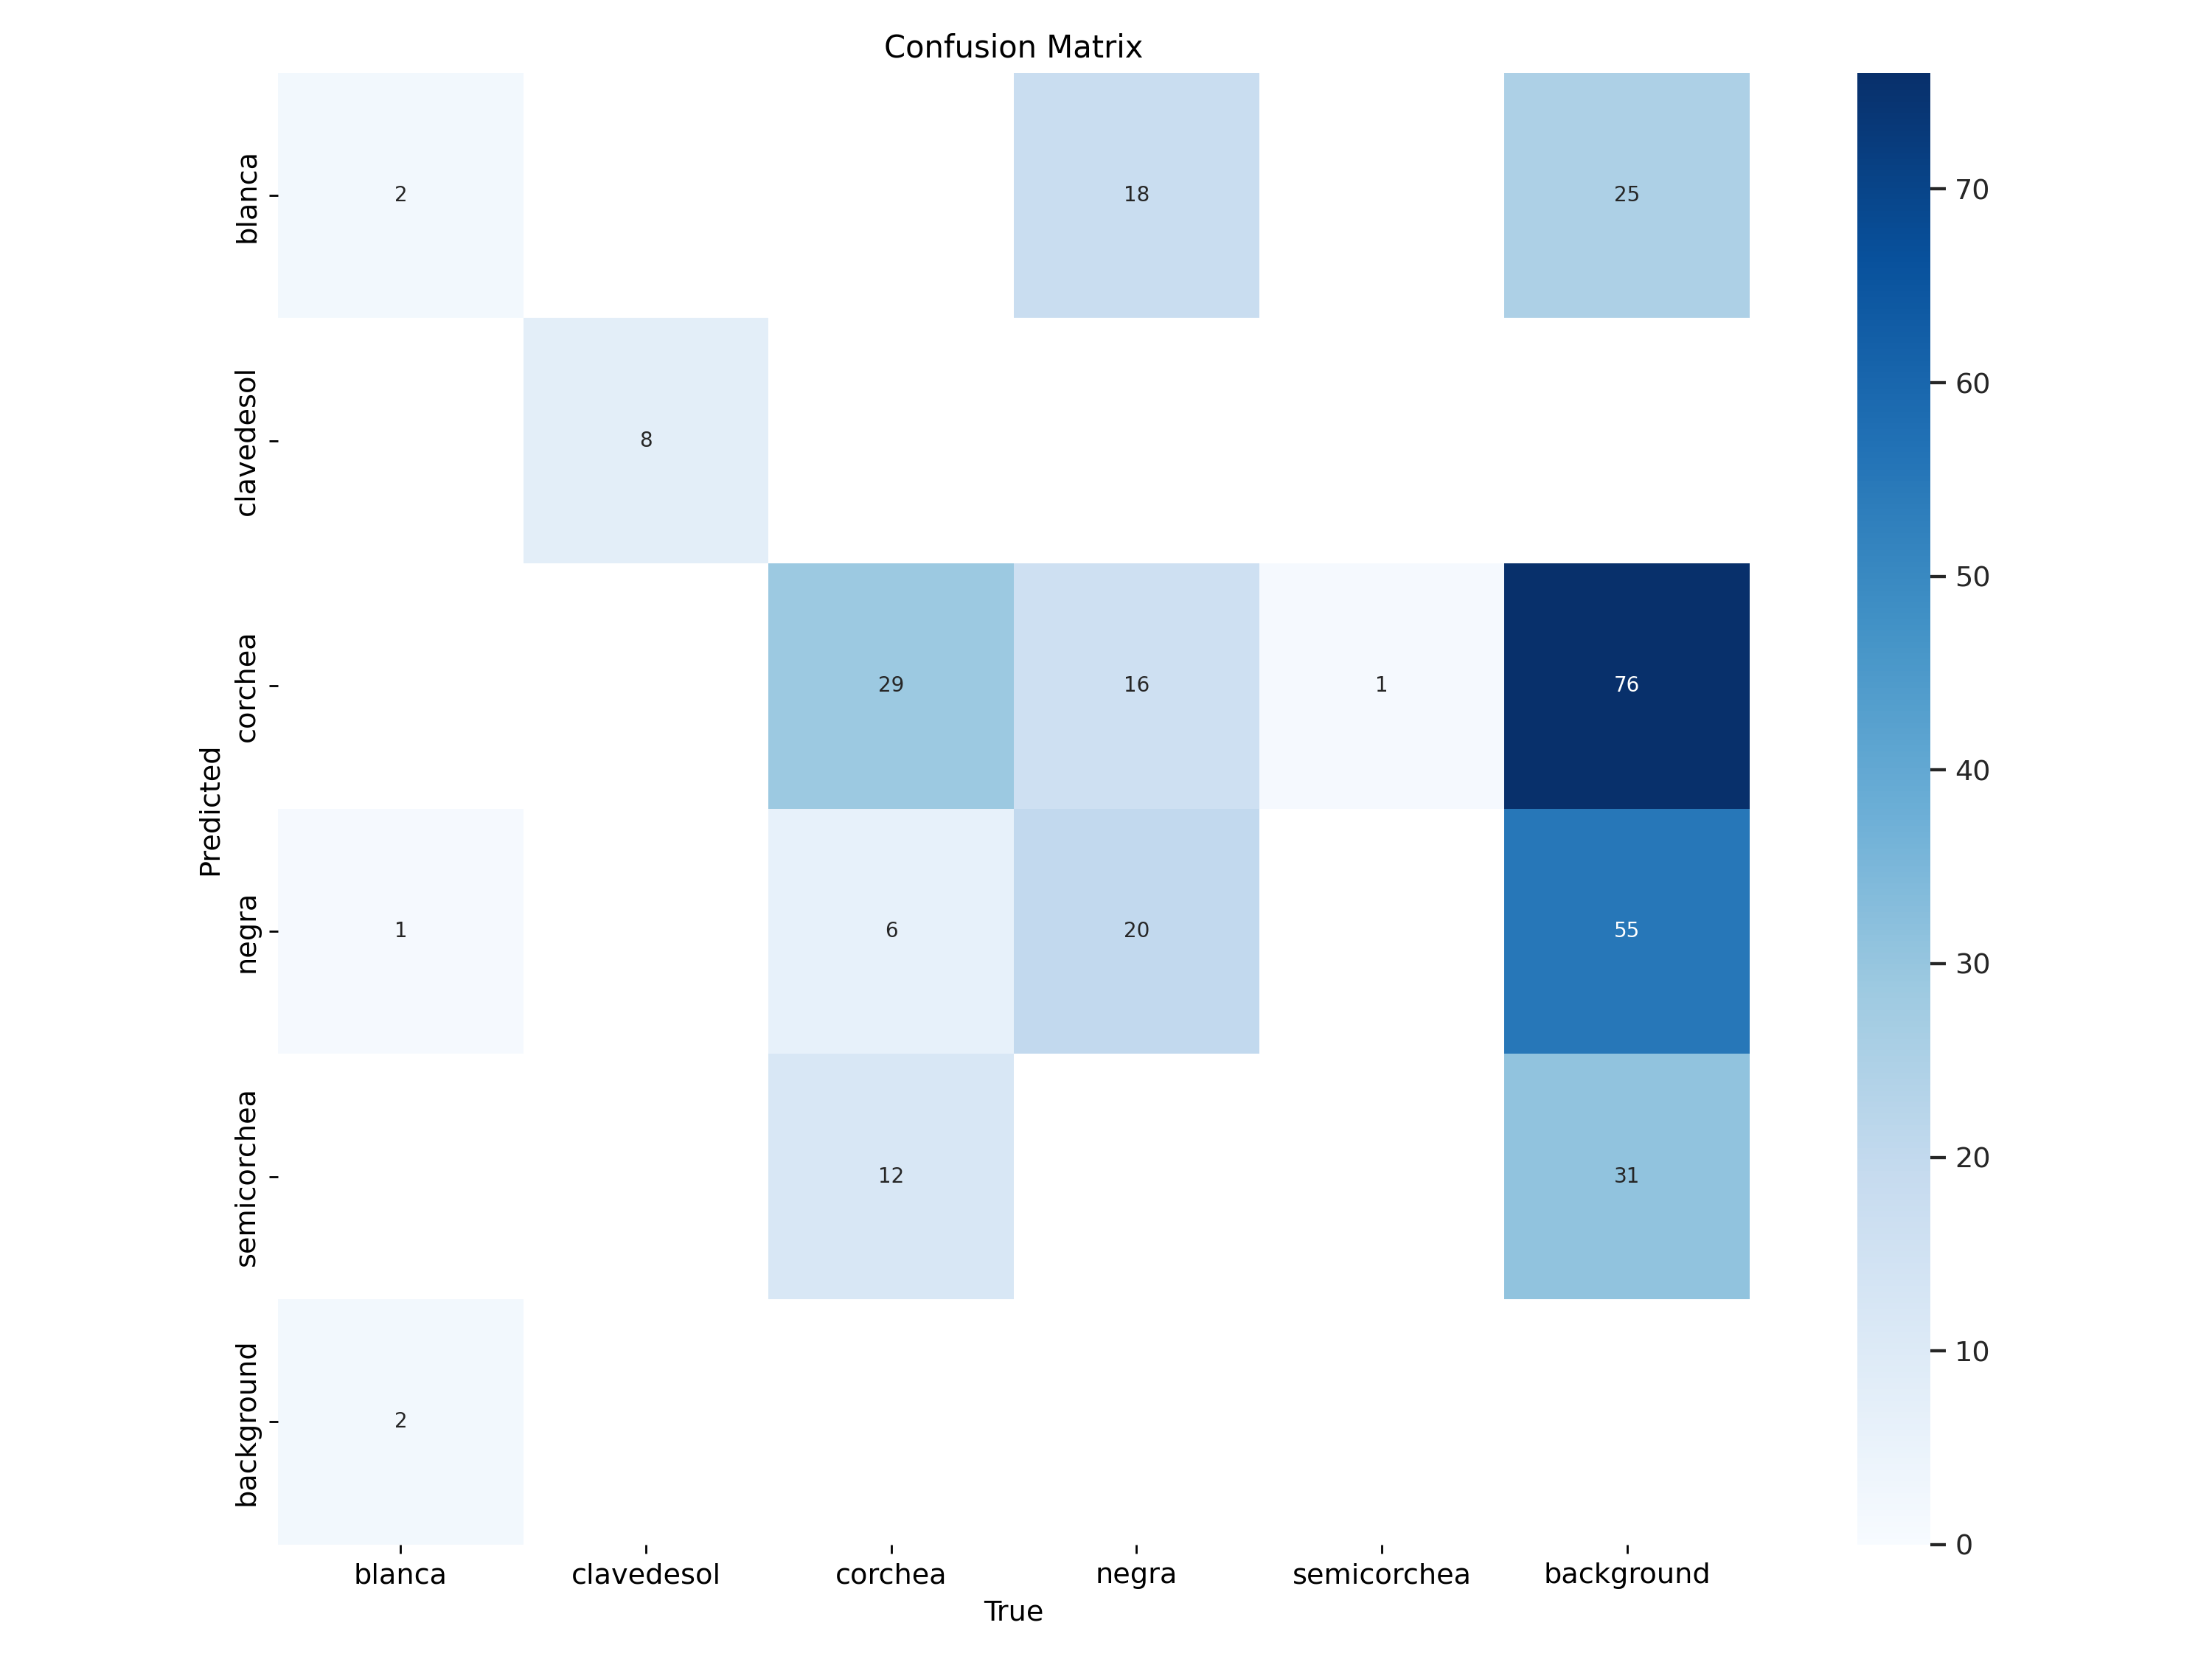

In [ ]:
Image(filename='/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/runs/segment/train2/confusion_matrix.png', width=800)

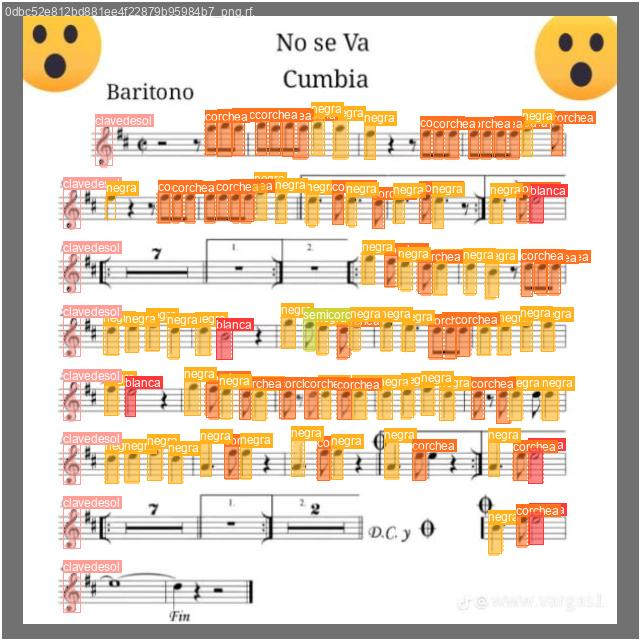

In [ ]:
Image(filename='/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/runs/segment/train2/val_batch0_labels.jpg', width=800)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/runs/segment/train2/weights/best.pt data=/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45915743 parameters, 0 gradients, 220.1 GFLOPs
100% 755k/755k [00:00<00:00, 24.2MB/s]
val: Scanning /content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/valid/labels.cache... 1 images, 0 backgrounds, 0 corrupt: 100% 1/1 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:06<00:00,  6.24s/it]
                   all          1        115      0.839      0.631      0.635       0.39      0.612      0.449      0.415      0.161
                blanca          1          5      0.608        0.4      0.431      0.129          0          0          0          0
            clavedesol          1          8         

In [ ]:
/content/drive/MyDrive/MiProyecto/pruebas.jpg
/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/valid/images/0dbc52e812bd881ee4f22879b95984b7_png.rf.f1bce2373f654fac0ad110be6dcfdeae.jpg

/content/prueba2.jpg

/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/prueba2.jpg

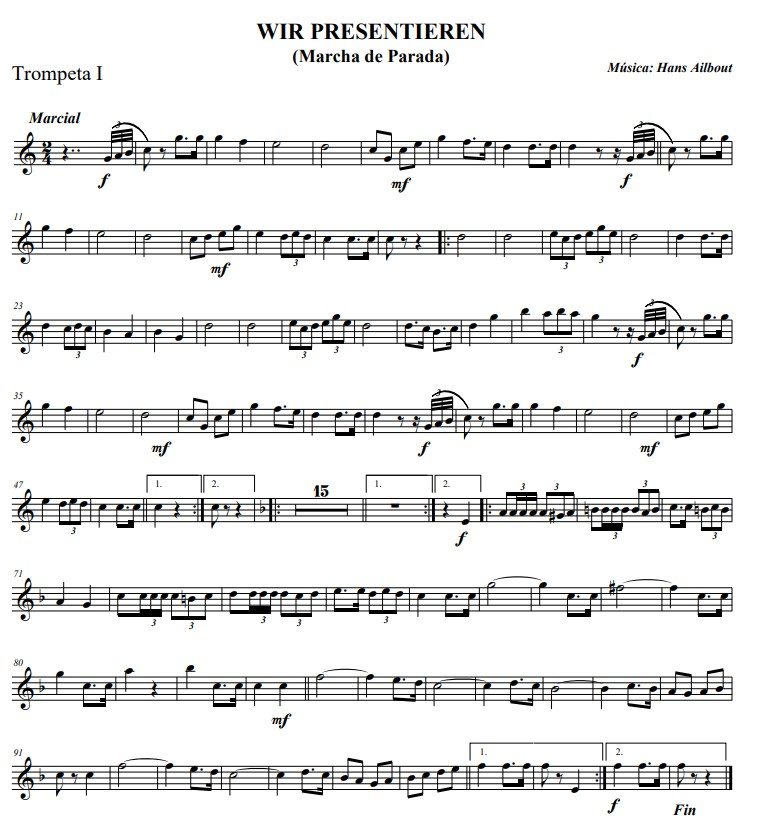

In [ ]:
import cv2
from IPython.display import Image
from ultralytics import YOLO
img_name='pruebas'
img =cv2.imread(f"/content/drive/MyDrive/MiProyecto/{img_name}.jpg")
# Mostrar la imagen en una ventana
Image(filename=f"/content/drive/MyDrive/MiProyecto/{img_name}.jpg", width=600)

In [ ]:
import cv2
from IPython.display import Image
from ultralytics import YOLO
img_name='pruebas'
img =cv2.imread(f"/content/drive/MyDrive/MiProyecto/{img_name}.jpg")
# Mostrar la imagen en una ventana
Image(filename=f"/content/drive/MyDrive/MiProyecto/{img_name}.jpg", width=600)

In [ ]:
model= YOLO("/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/runs/segment/train2/weights/best.pt")
pred= model.predict(img)[0]
pred= pred.plot()
cv2.imwrite(f"{img_name}.jpg", pred)


0: 608x576 24 blancas, 8 clavedesols, 209 corcheas, 42 negras, 17 semicorcheas, 153.9ms
Speed: 5.9ms preprocess, 153.9ms inference, 2173.5ms postprocess per image at shape (1, 3, 608, 576)


True

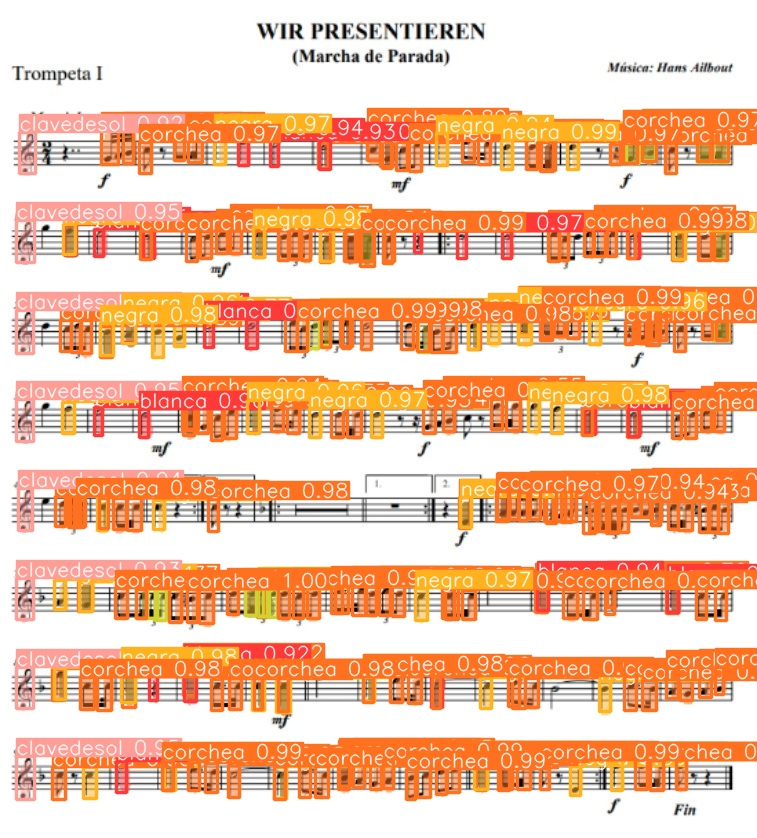

In [ ]:
Image(filename=f"/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/{img_name}.jpg", width=800)

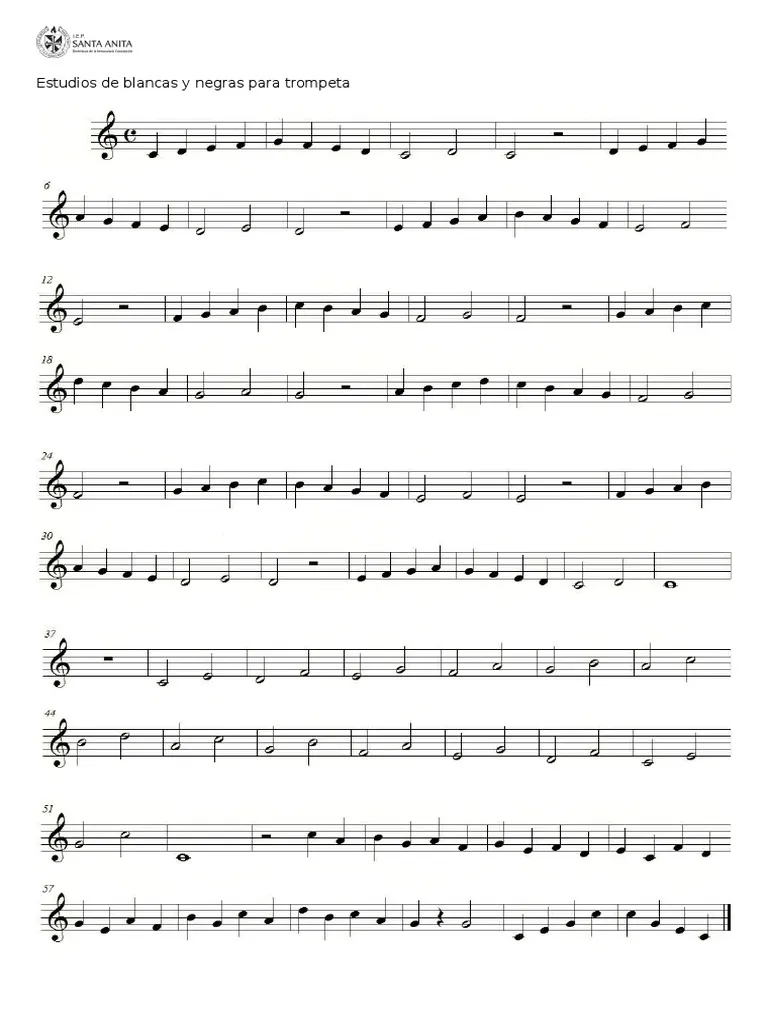

In [ ]:
#/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/
#/content/1711641094.jpg
import cv2
from IPython.display import Image
from ultralytics import YOLO
img_name='1711641094'
img =cv2.imread(f"/content/{img_name}.jpg")
# Mostrar la imagen en una ventana
Image(filename=f"/content/{img_name}.jpg", width=600)


0: 608x480 54 blancas, 10 clavedesols, 58 corcheas, 114 negras, 63.9ms
Speed: 7.0ms preprocess, 63.9ms inference, 11.2ms postprocess per image at shape (1, 3, 608, 480)


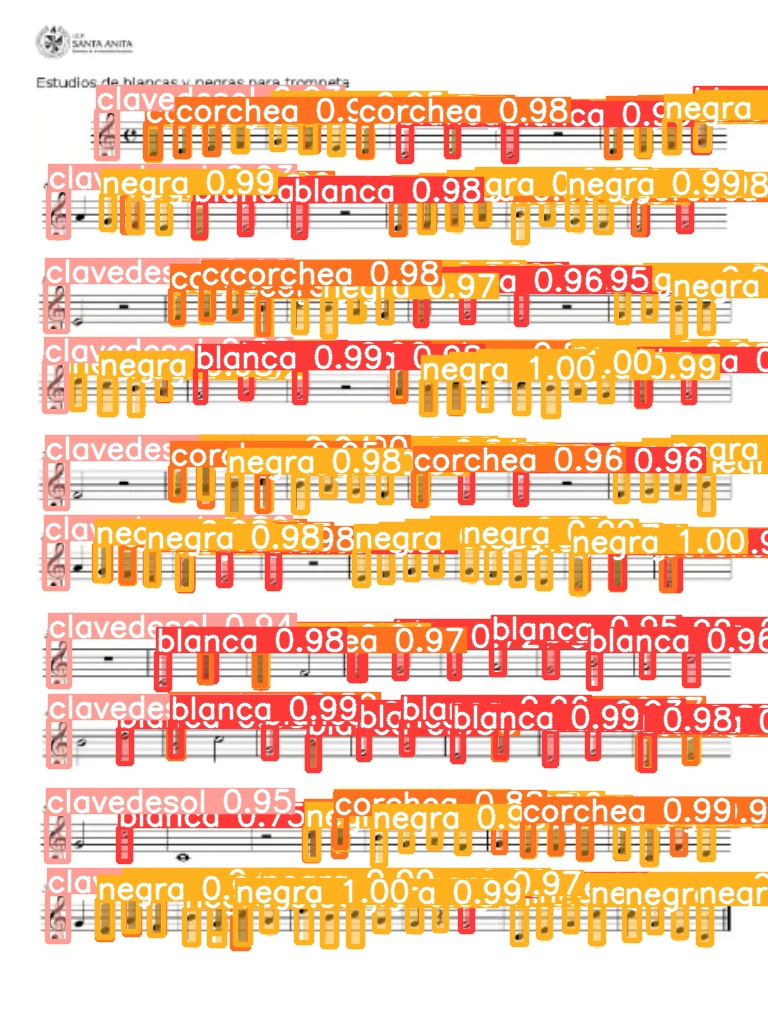

In [ ]:
model= YOLO("/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/runs/segment/train2/weights/best.pt")
pred= model.predict(img)[0]
pred= pred.plot()
cv2.imwrite(f"{img_name}.jpg", pred)

Image(filename=f"/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/{img_name}.jpg", width=800)

In [ ]:
import music21

# Suponiendo que 'image_width' e 'image_height' son las dimensiones de la imagen original
image_width = 608
image_height = 576

# Función para desnormalizar las coordenadas
def desnormalize_coords(coords, img_width, img_height):
    x1, y1, x2, y2, x3, y3, x4, y4 = coords
    return (
        x1 * img_width, y1 * img_height,
        x2 * img_width, y2 * img_height,
        x3 * img_width, y3 * img_height,
        x4 * img_width, y4 * img_height
    )

# Función para mapear las coordenadas a notas musicales
def coords_to_notes(coords):
    # Aquí debes implementar la lógica para convertir las coordenadas
    # a notas musicales, teniendo en cuenta la posición en el pentagrama
    # Esta es una implementación ficticia, necesitarás ajustarla a tu lógica
    x1, y1, x2, y2, x3, y3, x4, y4 = coords
    # Determinar la nota basada en la posición y
    # Esto es solo un ejemplo y no refleja la lógica real
    note_name = 'C4' if y1 < img_height / 2 else 'G4'
    duration = 'quarter' if x2 - x1 > 50 else 'eighth'
    return music21.note.Note(note_name, type=duration)

# Leer el archivo de texto con las coordenadas normalizadas
with open('path/to/your/labels.txt', 'r') as file:
    lines = file.readlines()

# Crear una partitura en music21
score = music21.stream.Score()

# Procesar cada detección
for line in lines:
    parts = line.strip().split()
    class_id = int(parts[0])
    normalized_coords = list(map(float, parts[1:]))

    # Desnormalizar las coordenadas
    coords = desnormalize_coords(normalized_coords, image_width, image_height)

    # Convertir las coordenadas a notas musicales
    note = coords_to_notes(coords)
    score.append(note)

# Exportar la partitura a un archivo MusicXML
score.write('musicxml', fp='output.xml')


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/labels.txt'

In [ ]:
import music21  # Importa la librería music21 para trabajar con notación musical

# Carga tu modelo personalizado
model = YOLO('/content/drive/MyDrive/MiProyecto/PartiturasMusicalesyolov8/runs/segment/train2/weights/best.pt')
image_path = '/content/drive/MyDrive/MiProyecto/pruebas.jpg'
# Función para predecir y extraer las posiciones de las notas
def predict_and_extract(image_path):
    # Realiza la predicción
    results = model(image_path)

    # Asegúrate de que hay resultados antes de continuar
    if len(results) > 0:
        # Extrae las posiciones de las notas detectadas
        notes_positions = []
        # Accede al primer elemento de la lista de resultados
        detections = results[0]
        for det in detections.pred:
            # Cada 'det' contiene las coordenadas (x1, y1, x2, y2) y la confianza
            x1, y1, x2, y2, conf = det
            notes_positions.append((x1, y1, x2, y2))

        return notes_positions
    else:
        return []




# Función para convertir las posiciones a notación musical
def positions_to_notation(notes_positions):
    # Aquí debes implementar la lógica para convertir las posiciones
    # de las notas a objetos de notación musical que music21 pueda entender
    pass

# Función para exportar a MuseScore
def export_to_musescore(notation_objects):
    # Crea una partitura en music21
    score = music21.stream.Score()

    # Añade los objetos de notación musical a la partitura
    for obj in notation_objects:
        score.append(obj)

    # Exporta la partitura a un archivo MusicXML
    score.write('musicxml', fp='output.xml')

# Uso de las funciones
image_path = '/content/drive/MyDrive/MiProyecto/pruebas.jpg'
notes_positions = predict_and_extract(image_path)
notation_objects = positions_to_notation(notes_positions)
export_to_musescore(notation_objects)



image 1/1 /content/drive/MyDrive/MiProyecto/pruebas.jpg: 608x576 24 blancas, 8 clavedesols, 209 corcheas, 42 negras, 17 semicorcheas, 66.1ms
Speed: 3.7ms preprocess, 66.1ms inference, 9.9ms postprocess per image at shape (1, 3, 608, 576)


AttributeError: 'Results' object has no attribute 'pred'. See valid attributes below.

    A class for storing and manipulating inference results.

    Attributes:
        orig_img (numpy.ndarray): Original image as a numpy array.
        orig_shape (tuple): Original image shape in (height, width) format.
        boxes (Boxes, optional): Object containing detection bounding boxes.
        masks (Masks, optional): Object containing detection masks.
        probs (Probs, optional): Object containing class probabilities for classification tasks.
        keypoints (Keypoints, optional): Object containing detected keypoints for each object.
        speed (dict): Dictionary of preprocess, inference, and postprocess speeds (ms/image).
        names (dict): Dictionary of class names.
        path (str): Path to the image file.

    Methods:
        update(boxes=None, masks=None, probs=None, obb=None): Updates object attributes with new detection results.
        cpu(): Returns a copy of the Results object with all tensors on CPU memory.
        numpy(): Returns a copy of the Results object with all tensors as numpy arrays.
        cuda(): Returns a copy of the Results object with all tensors on GPU memory.
        to(*args, **kwargs): Returns a copy of the Results object with tensors on a specified device and dtype.
        new(): Returns a new Results object with the same image, path, and names.
        plot(...): Plots detection results on an input image, returning an annotated image.
        show(): Show annotated results to screen.
        save(filename): Save annotated results to file.
        verbose(): Returns a log string for each task, detailing detections and classifications.
        save_txt(txt_file, save_conf=False): Saves detection results to a text file.
        save_crop(save_dir, file_name=Path("im.jpg")): Saves cropped detection images.
        tojson(normalize=False): Converts detection results to JSON format.
    